## Your exercise

Complete the following code block for image classification problem with the old MNIST dataset.

<center><img src=https://miro.medium.com/max/1650/1*XdCMCaHPt-pqtEibUfAnNw.png width="520px">
<br>
MNIST Dataset and Number Classification <sup><a href=https://www.katacoda.com/basiafusinska/courses/tensorflow-getting-started/tensorflow-mnist-beginner>[1]<a></sup></center>

###Downloading the MNIST data

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.mnist.load_data()
print('Done')

Done


The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students <sup><a href=https://en.wikipedia.org/wiki/MNIST_database target=_blank>[2]</a></sup>.

train_images and test_images parts contain greyscale RGB codes (from 0 to 255) while train_labels and test_labels parts contains labels from 0 to 9 which represents which number they actually are. 

Number of train_image: 60000
Size of each image is 28x28
First image label: 5
First image:


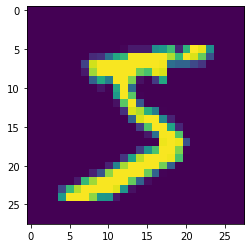

In [0]:
# your code to explore the data here
print(f"Number of train_image: {train_images.shape[0]}")
print(f"Size of each image is {train_images.shape[1]}x{train_images.shape[2]}")
#print(f"First image data: {train_images[0]}")
print(f"First image label: {train_labels[0]}")
print(f"First image:")
plt.imshow(train_images[0])
plt.show()

Number of test_image: 10000
Size of each image is 28x28
First image label: 7
First image:


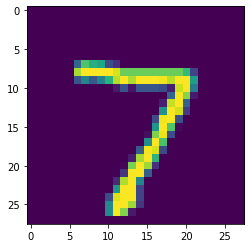

In [0]:
print(f"Number of test_image: {test_images.shape[0]}")
print(f"Size of each image is {test_images.shape[1]}x{test_images.shape[2]}")
#print(f"First image data: {test_images[0]}")
print(f"First image label: {test_labels[0]}")
print(f"First image:")
plt.imshow(test_images[0])
plt.show()

To visualize these numbers, we can get help from matplotlib.

Show first 25 images


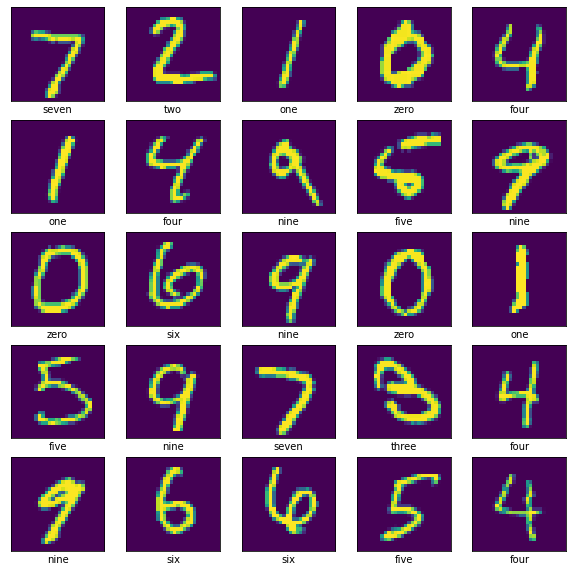

In [0]:
# your code here
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine'] 

print("Show first 25 images")
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i]])
plt.show()

###Normalizing the images

We normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value.
# your code here
train_images = train_images / 255.0
test_images = test_images / 255.0

print('train_images shape:', train_images.shape)
print('Number of images in train_images', train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

train_images shape: (60000, 28, 28)
Number of images in train_images 60000
Number of images in test_images 10000


In [0]:
#train_images[0]

###Building, compiling and fitting the model

In [0]:
# your code here

# consturct model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile( loss='sparse_categorical_crossentropy' ,
                       optimizer=tf.optimizers.Adam(),metrics=['accuracy']
                     )

# train model
model.fit (train_images, train_labels, epochs=5)

print('Done..')

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2536 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0444 - accuracy: 0.9862
Done..


###Evaluating the model

In [0]:
# your code here
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9752

Test accuracy: 0.98


###Makeing the prediction

In [0]:
predictions = model.predict(test_images)

In [0]:
# modify the above plot_image() and plot_value_array we have already seen here
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine'] 

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'cyan'
  else:
    color = 'orange'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


print('Done..')

Done..


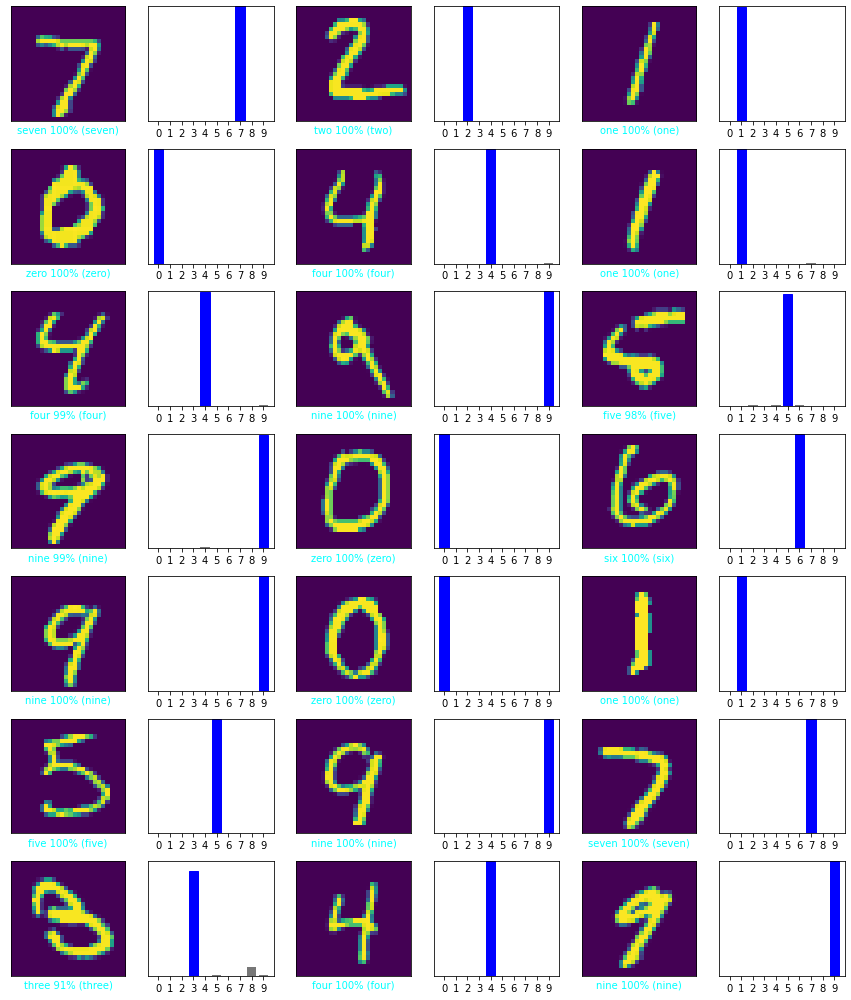

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()